# 作业1：Numpy练习

本次作业主要对Python中的矩阵运算库Numpy进行练习。如遇到不清楚的函数或主题，可以查阅[官方文档](https://numpy.org/doc/stable/user/index.html)或利用搜索引擎寻求帮助。

### 基础知识

本节对Numpy进行简要介绍，没有实际的题目，可直接运行每一个单元格。

首先导入Numpy包：

In [2]:
import numpy as np

利用Numpy可以方便地创建向量和矩阵：

In [3]:
#创建向量
vec = np.array([1.0, 2.0, 5.0])
print(vec)

[1. 2. 5.]


In [4]:
#创建矩阵
mat = np.array([[1.0, 2.0, 2.0], [3.0, 5.0, 4.5]])
print(mat)

[[1.  2.  2. ]
 [3.  5.  4.5]]


In [5]:
#获取等间隔数组
#linspace(start, stop, num=50, endpoint=True, retstep=False,dtype=None)
#endpoint 若为True，则stop为最后一个样本

vec = np.linspace(start=1.0, stop=5.0, num=12)
print(vec)

[1.         1.36363636 1.72727273 2.09090909 2.45454545 2.81818182
 3.18181818 3.54545455 3.90909091 4.27272727 4.63636364 5.        ]


In [6]:
#重塑为3*4的数组
mat = np.reshape(vec, (3, 4))
print(mat)

[[1.         1.36363636 1.72727273 2.09090909]
 [2.45454545 2.81818182 3.18181818 3.54545455]
 [3.90909091 4.27272727 4.63636364 5.        ]]


Python中下标是从0开始的，请一定要记住这一点，否则会造成很多逻辑错误。

In [7]:
print(vec[0])
print(vec[2])
print(mat[1, 1])

1.0
1.7272727272727273
2.8181818181818183


负数的下标表示从尾部往前数：

In [8]:
print(vec[-1])
print(vec[-2])
print(mat[1, -1])    #打印矩阵第2行最后一个元素

5.0
4.636363636363637
3.5454545454545454


可以用冒号选取向量中的一段范围，格式为`x[start:end]`，选出的元素包含`x[start]`，不包含`x[end]`。

In [9]:
print(vec[1:3])

[1.36363636 1.72727273]


In [10]:
print(mat[:, :2])

[[1.         1.36363636]
 [2.45454545 2.81818182]
 [3.90909091 4.27272727]]


在编写函数时，经常需要各种测试数据，此时可以用Numpy来生成各类随机数。在需要用到随机数之前，一定要先设置随机数种子，以使结果可重复。

In [11]:
np.random.seed(123)

生成均匀分布随机数：

In [12]:
unif = np.random.uniform(low=0.0, high=1.0, size=5)
print(unif)

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]


正态分布随机数：

In [13]:
norm = np.random.normal(loc=0.0, scale=1.0, size=(2, 5))
print(norm)

[[ 0.32210607 -0.05151772 -0.20420096  1.97934843 -1.61930007]
 [-1.11396442 -0.44744072  1.66840161 -0.14337247 -0.6191909 ]]


Numpy提供了许多数学函数对向量和矩阵进行操作：

In [14]:
print(np.exp(norm))   #为标量运算，对矩阵中每个元素进行操作

[[1.38003115 0.94978682 0.81529851 7.23802539 0.19803726]
 [0.32825504 0.63926211 5.30368367 0.86643129 0.53837986]]


In [15]:
print(np.log(unif))

[-0.36173173 -1.2512764  -1.48345987 -0.59544936 -0.32924188]


也可以对向量和矩阵进行汇总：

In [16]:
np.sum(unif)

2.4802437129808985

In [17]:
np.mean(norm)

-0.02291311494411293

汇总可以按行或者按列进行，这由`axis`参数决定。0表示运算时第一个维度（行）在变化，1表示运算时第二个维度（列）在变化。
再次提醒，Python中以0表示第一个元素！

In [18]:
np.mean(norm, axis=0)  # 对第一个维度（行标在变化）求均值？         #对每一列求均值

array([-0.39592917, -0.24947922,  0.73210032,  0.91798798, -1.11924548])

In [19]:
np.var(norm, axis=1)  # 对第二个维度（列标在变化）求方差

array([1.33033757, 0.90853666])

### 第1题

(a) 生成10000个服从(0, 1)间均匀分布的随机数，赋值给变量`x`，并打印其**前10个**元素。

In [20]:
#设定随机数种子
np.random.seed(100)
x = np.random.uniform(0.0, 1.0, size=10000)
print(x[:10])

[0.54340494 0.27836939 0.42451759 0.84477613 0.00471886 0.12156912
 0.67074908 0.82585276 0.13670659 0.57509333]


(b) 创建向量`y`，令其在数学上等于`y=-log(x)`，其中`log`为自然对数。打印`y`的**最后10个**元素。

In [21]:
y=np.log(x)*(-1)
print(y[-10:])

[0.16444909 1.37319694 0.97667815 0.57162608 0.47369285 0.49493178
 1.22075032 1.01960451 3.40173209 2.38131188]


(c) 查找在Python中绘制图形的方法，绘制`y`的直方图。

(array([1.06e+03, 9.31e+02, 8.05e+02, 7.59e+02, 6.84e+02, 6.04e+02,
        5.27e+02, 4.68e+02, 4.42e+02, 4.03e+02, 3.64e+02, 3.07e+02,
        2.81e+02, 2.45e+02, 2.30e+02, 1.97e+02, 1.63e+02, 1.70e+02,
        1.34e+02, 1.26e+02, 1.09e+02, 1.14e+02, 8.90e+01, 7.60e+01,
        8.10e+01, 8.00e+01, 5.50e+01, 5.40e+01, 4.40e+01, 3.60e+01,
        3.90e+01, 3.80e+01, 2.50e+01, 2.10e+01, 3.20e+01, 2.40e+01,
        2.70e+01, 1.80e+01, 1.00e+01, 1.30e+01, 1.20e+01, 1.30e+01,
        1.10e+01, 8.00e+00, 5.00e+00, 6.00e+00, 6.00e+00, 5.00e+00,
        5.00e+00, 8.00e+00, 5.00e+00, 3.00e+00, 3.00e+00, 4.00e+00,
        0.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 2.00e+00,
        1.00e+00, 2.00e+00, 0.00e+00, 2.00e+00, 2.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 2.00e+00, 0.00e+00, 2.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

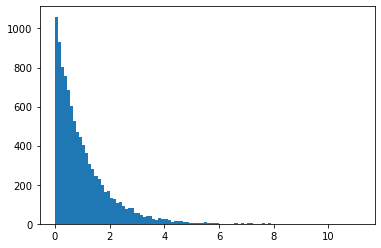

In [22]:
import matplotlib.pyplot as plt
plt.hist(y,bins=100)    

(d) 猜测或证明`y`服从什么分布，并简要说明理由。

F(y)=P(Y<=y)=P(-logX<=y)=P(x>=exp(-y))=1-exp(-y)
所以y服从参数为1的指数分布

### 第2题

(a) 考虑Sigmoid函数 $$\sigma(x)=\frac{e^x}{1+e^x}$$

请在Python中编写一个函数`sigmoid(x)`，令其可以接收一个向量`x`，返回Sigmoid函数在`x`上的取值。

In [23]:
def sigmoid(x):
    y=np.exp(x)
    return y/(1+y)
sigmoid(5)
sigmoid(3)

0.9525741268224333

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [24]:
x=np.array([-1000, -100, -10, 0, 10, 100, 1000])
sigmoid(x)

<ipython-input-23-1fdffd475b0e>:2: RuntimeWarning: overflow encountered in exp
  y=np.exp(x)
<ipython-input-23-1fdffd475b0e>:3: RuntimeWarning: invalid value encountered in true_divide
  return y/(1+y)


array([0.00000000e+00, 3.72007598e-44, 4.53978687e-05, 5.00000000e-01,
       9.99954602e-01, 1.00000000e+00,            nan])

返回错误为overflow encountered in exp以及invalid value encountered in true_divide
向量的最后一个元素为空值

(c) 如果出现警告或错误，思考可能的原因是什么。（提示：Sigmoid函数真实的取值范围是多少？分子和分母的取值范围又是什么？是否可以对Sigmoid函数的表达式进行某种等价变换？）如果一切正常，可忽略此问题。

因变量的取值范围为(0,1),分子分母的取值范围（0，正无穷）
等价的形式为1/(1+exp(-x))
原因为numpy数组x中可能有绝对值比较大的负数，传递参数时，分母np.exp(-x)会非常大，导致np.exp(-x)溢出

(d) 请再次尝试编写`sigmoid(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

In [27]:
#方法一：对每一个元素的正负进行分类讨论
def sigmoid(x):
    y=[]
    for i in range(len(x)):
        if x[i]>=0:
            y.append(1.0/(1+np.exp(-x[i])))
        else:      #对负责采取特殊处理
            y.append(np.exp(x[i])/(np.exp(x[i])+1))
    return y
sigmoid(x)

[0.0,
 3.720075976020836e-44,
 4.5397868702434395e-05,
 0.5,
 0.9999546021312976,
 1.0,
 1.0]

In [43]:
#方法一提升 避免使用循环
def sigmoid(x):
    #分母表示为绝对值形式
    mu=1+np.exp(np.abs(x)*(-1))
    zi=np.where(x>=0,1,np.exp(-np.abs(x)))   #注意复数的传入
    y=zi/mu
    return y
sigmoid(x)

array([0.00000000e+00, 3.72007598e-44, 4.53978687e-05, 5.00000000e-01,
       9.99954602e-01, 1.00000000e+00, 1.00000000e+00])

In [40]:
#方法二：采用替代函数，参考自CSDN
def logistic_function(x):
    return .5 * (1 + np.tanh(.5 * x))
logistic_function(x)

array([0.00000000e+00, 0.00000000e+00, 4.53978687e-05, 5.00000000e-01,
       9.99954602e-01, 1.00000000e+00, 1.00000000e+00])

### 第3题

(a) 考虑Softplus函数 $$\mathrm{softplus}(x)=\log(1+e^x)$$

请在Python中编写一个函数`softplus(x)`，令其可以接收一个向量`x`，返回Softplus函数在`x`上的取值。

In [36]:
def softplus(x):
    return np.log(1+np.exp(x))
softplus(10)

10.000045398899218

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [37]:
x=np.array([-1000, -100, -10, 0, 10, 100, 1000])
softplus(x)

<ipython-input-36-b5975d7ea466>:2: RuntimeWarning: overflow encountered in exp
  return np.log(1+np.exp(x))


array([0.00000000e+00, 0.00000000e+00, 4.53988992e-05, 6.93147181e-01,
       1.00000454e+01, 1.00000000e+02,            inf])

overflow encountered in exp报错

(c) 如果出现警告或错误，参照第2题的方法，思考可能的原因是什么。如果一切正常，可忽略此问题。

因为x出现较大的正值，导致exp(x)溢出，出现无穷值

(d) 请再次尝试编写`softplus(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

In [38]:
#采取近似
def softplus_update(x):
    limit=30
    y=[]
    for i in range(len(x)):
        if x[i]>limit:
            y.append(x[i])
        else:
            y.append(np.log(1.0 + np.exp(x[i])))
    return y
softplus_update(x)

[0.0,
 0.0,
 4.5398899216870535e-05,
 0.6931471805599453,
 10.000045398899218,
 100,
 1000]

采取数学上的近似，当x>30时，我们有如下的近似：log(1+exp(x)) ~= log(exp(x)) = x

In [42]:
#方法二：提取
#拆分为log(1+𝑒𝑥p(x))=log[exp(x)(exp(-x)+1)]=x+log(1+exp(-x))

def softplus_update1(x):
    y=np.maximum(x,0)+np.log(1+np.exp(-np.abs(x)))
    return y
softplus_update1(x)

array([0.00000000e+00, 0.00000000e+00, 4.53988992e-05, 6.93147181e-01,
       1.00000454e+01, 1.00000000e+02, 1.00000000e+03])